Carlos Iván Fonseca Mondragón - A01771689

In [1]:
# Mostrar resultados de predicción
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

from sklearn.metrics import mean_absolute_error
tf.experimental.numpy.experimental_enable_numpy_behavior()

In [2]:
# Para probar nuevas imagenes, cargar pares de imágenes en las carpetas, deben de tener el mismo nombre y ser de tamaño 64x64
COLOR_PATH = 'color_test/'
GRAY_PATH = 'gray_test/'

def load_image_pair(): 
    gray_images = []
    color_images = []
    for img in os.listdir(GRAY_PATH): #Mismo número de imágenes en ambas carpetas
        image_gray = tf.io.read_file(os.path.join(GRAY_PATH + img)) #Cargar cada imagen
        image_color = tf.io.read_file(os.path.join(COLOR_PATH + img))
        
        gray_img_tensor_int = tf.image.decode_jpeg(image_gray, channels=1)
        color_img_tensor_int = tf.image.decode_jpeg(image_color, channels=3)
    
        gray_img_float = tf.image.convert_image_dtype(gray_img_tensor_int, tf.float32, )
        color_img_float = tf.image.convert_image_dtype(color_img_tensor_int, tf.float32)    
        
        gray_images.append(gray_img_float)
        color_images.append(color_img_float)

    return gray_images, color_images

In [ ]:
X, y = load_image_pair()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step

MAE promedio sobre 6 imágenes: 0.125611



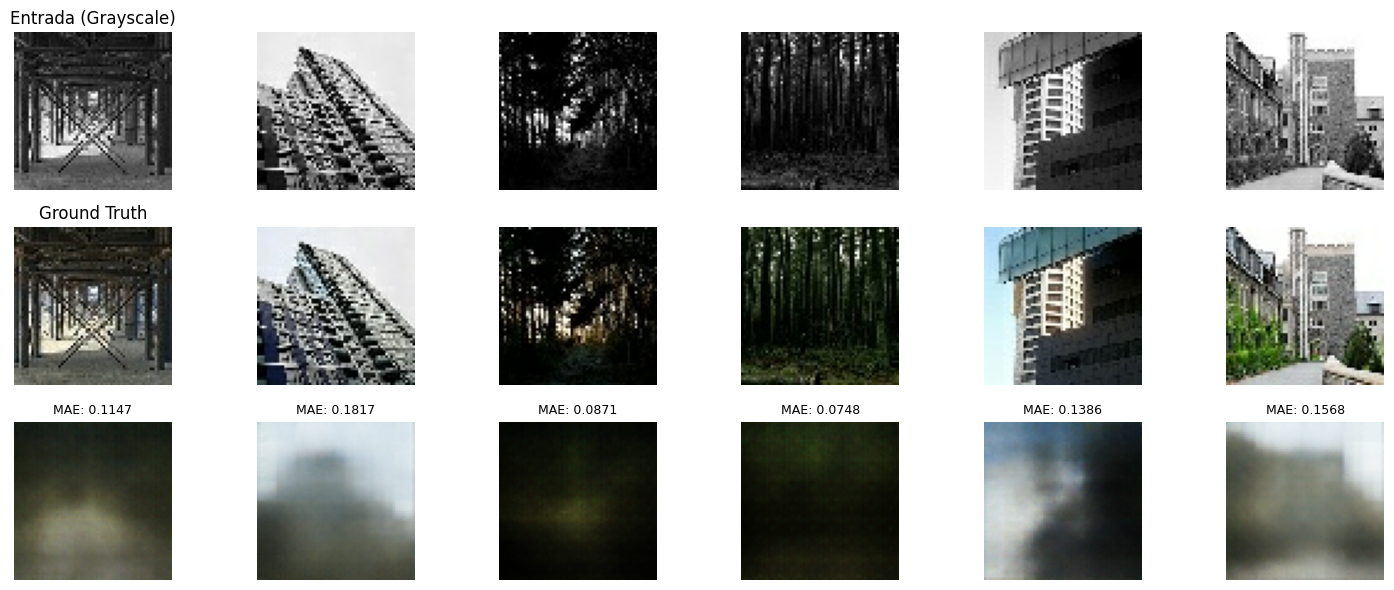

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

model = tf.keras.models.load_model('best_autoencoder_model.keras')

def _to_numpy(x):
    """Convierte tf.Tensor a np.ndarray si es necesario."""
    if hasattr(x, "numpy"):
        return x.numpy()
    return np.array(x)

def display_prediction(model, X_test, y_test, num_images=5):
    # Obtener predicciones (keras suele devolver numpy arrays, pero lo normalizamos)
    preds = model.predict(np.array(X_test[:num_images]))

    # Calcular MAE por imagen y MAE promedio
    mae_per_image = []
    for i in range(num_images):
        y_true = _to_numpy(y_test[i])
        y_pred = _to_numpy(preds[i])

        # Asegurarnos que las formas sean compatibles: (H,W,3) -> (-1,3)
        if y_true.ndim == 3 and y_true.shape[2] == 3:
            y_true_flat = y_true.reshape(-1, 3)
            y_pred_flat = y_pred.reshape(-1, 3)
        else:
            # Caída segura para imágenes en escala de grises u otras formas
            y_true_flat = y_true.reshape(-1)
            y_pred_flat = y_pred.reshape(-1)

        mae = mean_absolute_error(y_true_flat, y_pred_flat)
        mae_per_image.append(mae)

    mae_total = np.mean(mae_per_image)
    print(f"\nMAE promedio sobre {num_images} imágenes: {mae_total:.6f}\n")

    plt.figure(figsize=(15, 6))
    for i in range(num_images):
        plt.subplot(3, num_images, i + 1)
        x_vis = _to_numpy(X_test[i])
        plt.imshow(np.squeeze(x_vis), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title('Entrada (Grayscale)')

        # Ground truth
        plt.subplot(3, num_images, i + 1 + num_images)
        plt.imshow(_to_numpy(y_test[i]))
        plt.axis('off')
        if i == 0:
            plt.title('Ground Truth')

        # Predicción + MAE
        plt.subplot(3, num_images, i + 1 + 2 * num_images)
        plt.imshow(_to_numpy(preds[i]))
        plt.axis('off')
        plt.title(f"MAE: {mae_per_image[i]:.4f}", fontsize=9)

    plt.tight_layout()
    plt.show()


display_prediction(model, X_test, y_test, num_images=6)